<a href="https://colab.research.google.com/github/soyab266/data-science/blob/master/flight_fare_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [ ]:
df=pd.read_excel('/content/a1_FlightFare_Dataset.xlsx')
df1=pd.read_excel('/content/Data_Train.xlsx')

In [ ]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [ ]:
df.shape

(10001, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10001 non-null  object
 1   Date_of_Journey  10001 non-null  object
 2   Source           10001 non-null  object
 3   Destination      10001 non-null  object
 4   Route            10000 non-null  object
 5   Dep_Time         10001 non-null  object
 6   Arrival_Time     10001 non-null  object
 7   Duration         10001 non-null  object
 8   Total_Stops      10000 non-null  object
 9   Additional_Info  10001 non-null  object
 10  Price            10001 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 859.6+ KB


In [ ]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
df.duplicated().sum()

188

In [ ]:
df.sample(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
135,Jet Airways,18/05/2019,Delhi,Cochin,DEL → AMD → BOM → COK,19:10,19:00 19 May,23h 50m,2 stops,No info,15129
9686,IndiGo,27/05/2019,Kolkata,Banglore,CCU → BLR,22:15,00:50 28 May,2h 35m,non-stop,No info,4804


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 10000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10000 non-null  object
 1   Date_of_Journey  10000 non-null  object
 2   Source           10000 non-null  object
 3   Destination      10000 non-null  object
 4   Route            10000 non-null  object
 5   Dep_Time         10000 non-null  object
 6   Arrival_Time     10000 non-null  object
 7   Duration         10000 non-null  object
 8   Total_Stops      10000 non-null  object
 9   Additional_Info  10000 non-null  object
 10  Price            10000 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 937.5+ KB


In [ ]:
import datetime
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])

<ipython-input-7-a7cd37b0d1aa>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])


In [ ]:
df['Date_of_Journey'].dt.year.head(5)

0    2019
1    2019
2    2019
3    2019
4    2019
Name: Date_of_Journey, dtype: int64

In [ ]:
df['Date_of_Journey'].dt.day.head(5)

0    24
1     5
2     6
3     5
4     3
Name: Date_of_Journey, dtype: int64

In [ ]:
df['Journey_day']=df['Date_of_Journey'].dt.day

In [ ]:
df['Journey_month']=df['Date_of_Journey'].dt.month

In [ ]:
df['Journey_year']=df['Date_of_Journey'].dt.year

In [ ]:
df.drop(columns=['Date_of_Journey'], inplace=True)

In [ ]:
df.shape

(10000, 13)

In [ ]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,2019


In [ ]:
df['dep_hour']=pd.to_datetime(df['Dep_Time']).dt.hour

In [ ]:
df['dep_minute']=pd.to_datetime(df['Dep_Time']).dt.minute

In [ ]:
df.drop(columns=['Dep_Time'], inplace =True)

In [ ]:
df.head(1)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,dep_hour,dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20


In [ ]:
df['Duration'].value_counts()

2h 50m     518
1h 30m     363
2h 45m     316
2h 55m     313
2h 35m     304
3h         245
2h 20m     221
2h 30m     206
2h 40m     150
2h 15m     127
1h 25m     122
2h 25m      94
13h 30m     89
7h 30m      84
9h 30m      82
13h 20m     82
3h 15m      81
8h 40m      76
7h 15m      72
3h 5m       72
8h          67
7h 35m      67
5h 30m      65
7h 5m       62
9h          61
5h 15m      61
11h 45m     60
9h 50m      59
5h          59
11h         59
6h 35m      58
12h 10m     55
14h 25m     55
12h 45m     54
22h 55m     54
1h 20m      54
10h 30m     53
12h 30m     52
11h 30m     51
16h 5m      51
15h 10m     49
5h 45m      48
7h 20m      47
4h 55m      47
10h 25m     47
12h         47
10h         46
8h 25m      45
10h 15m     45
5h 20m      43
12h 15m     42
6h 15m      42
11h 5m      41
14h 5m      41
9h 15m      40
8h 55m      40
9h 20m      39
13h         39
9h 35m      38
26h 55m     38
3h 10m      38
21h 15m     38
20h 10m     38
27h 35m     37
5h 5m       37
23h 40m     37
6h 25m    

In [ ]:
duration=list(df['Duration'])

In [ ]:

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]



duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))


df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins



In [ ]:
df.drop(columns=['Duration'],inplace=True)

In [ ]:
df.head(1)

,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,dep_hour,dep_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,non-stop,No info,3897,24,3,2019,22,20,2,50


In [ ]:
df['Airline'].value_counts()# nominal categorical feature required one hot encoding

Jet Airways                          3598
IndiGo                               1927
Air India                            1633
Multiple carriers                    1129
SpiceJet                              769
Vistara                               447
Air Asia                              296
GoAir                                 179
Multiple carriers Premium economy      13
Jet Airways Business                    5
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [ ]:
Airline=df[['Airline']]
current_airline_list=Airline['Airline']
new_airline=[]
for career in current_airline_list:
  if career in ['Jet Airways','IndiGo','Air India','Multiple carriers' ,'SpiceJet','Vistara' , 'GoAir', 'Vistara', 'Air Asia']:
    new_airline.append(career)
  else:
    new_airline.append('others')

Airline['Airline']=pd.DataFrame(new_airline)
print(Airline['Airline'].value_counts())



Jet Airways          3598
IndiGo               1927
Air India            1634
Multiple carriers    1129
SpiceJet              769
Vistara               447
Air Asia              296
GoAir                 179
others                 22
Name: Airline, dtype: int64


<ipython-input-63-03d0d6b7264a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(new_airline)


In [ ]:
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head(2)

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Vistara,Airline_others
0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0


In [ ]:
df['Source'].value_counts()

Delhi       4258
Kolkata     2678
Banglore    2058
Mumbai       647
Chennai      360
Name: Source, dtype: int64

In [ ]:
encode=pd.get_dummies(df['Source'],drop_first=True)
Source=pd.concat([df,encode], axis=1)
df.drop(columns=['Source'], inplace=True)
Source.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Chennai,Delhi,Kolkata,Mumbai
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,0,0,0,0


In [ ]:

destination_modified = df[["Destination"]].copy()
destination_modified['Destination'] = destination_modified['Destination'].apply(lambda value: 'Delhi' if value == 'New Delhi' else value)

# Perform one-hot encoding on the modified 'Destination' column
destination_encoded = pd.get_dummies(destination_modified, columns=['Destination'], drop_first=True)

# Concatenate the encoded columns back to the original DataFrame
dataset_encoded = pd.concat([df, destination_encoded], axis=1)

# Drop the original 'Destination' column
dataset_encoded.drop(['Destination'], axis=1, inplace=True)

# Now dataset_encoded contains the one-hot encoded 'Destination' data



In [ ]:
df.head(2)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [ ]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [ ]:
df['Total_Stops'].value_counts()

1 stop      5281
non-stop    3259
2 stops     1415
3 stops       44
4 stops        1
Name: Total_Stops, dtype: int64

<Axes: xlabel='Total_Stops', ylabel='Price'>

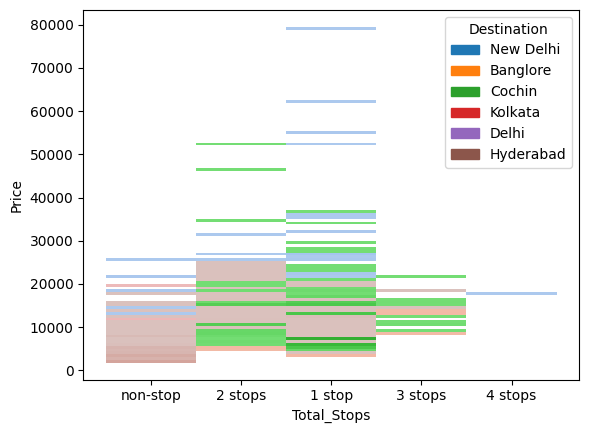

In [ ]:
sns.histplot(x= df['Total_Stops'], y=df['Price'],kde=True, hue=df['Destination'])

In [ ]:
import re
df.replace({'non-stop': 0 ,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4 }, inplace=True)
df.head(2)

,Airline,Date_of_Journey,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,n,No info,3897
1,Air India,1/05/2019,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662


In [ ]:
df['Total_Stops'].value_counts()

1    5281
n    3260
2    1415
3      44
4       1
Name: Total_Stops, dtype: int64

In [ ]:
df.head(2)

,Airline,Date_of_Journey,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,n,No info,3897
1,Air India,1/05/2019,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662


In [ ]:
df1.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [ ]:
df1=pd.concat([df,Airline,Source], axis=1)

In [ ]:
df1.drop(columns=['Airline','Source',], inplace =True)

In [ ]:
df1.drop(columns=['Date_of_Journey', 	'Destination', 	'Route' ,'Dep_Time', 	'Arrival_Time', 'Duration' ,'Total_Stops', 	'Additional_Info'], inplace=True)

In [ ]:
df1.drop_duplicates(inplace=True )

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(df1)



array([[-1.14164127, -0.65279764, -0.20789392, ..., -1.02996721,
        -0.51758315, -0.24339886],
       [-0.44663291,  1.53186829, -0.20789392, ..., -1.02996721,
         1.93205671, -0.24339886],
       [ 0.70156151, -0.65279764, -0.20789392, ...,  0.9709047 ,
        -0.51758315, -0.24339886],
       ...,
       [ 1.36500375,  1.53186829, -0.20789392, ...,  0.9709047 ,
        -0.51758315, -0.24339886],
       [-0.0292587 , -0.65279764, -0.20789392, ..., -1.02996721,
         1.93205671, -0.24339886],
       [-0.73921943, -0.65279764, -0.20789392, ..., -1.02996721,
         1.93205671, -0.24339886]])

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
x=df1.loc[:,['Price', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_others', 'Price', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai']]
y=df1.iloc[:,1]

In [ ]:
df1.columns

Index(['Price', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_others', 'Price', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai'],
      dtype='object')